In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import colorcet as cc

In [2]:
from ipywidgets import interact
from bokeh.models import MultiSelect
from math import ceil
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, Slider, TextInput
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
cc.b_glasbey_bw


['#d60000',
 '#8c3bff',
 '#018700',
 '#00acc6',
 '#97ff00',
 '#ff7ed1',
 '#6b004f',
 '#ffa52f',
 '#00009c',
 '#857067',
 '#004942',
 '#4f2a00',
 '#00fdcf',
 '#bcb6ff',
 '#95b379',
 '#bf03b8',
 '#2466a1',
 '#280041',
 '#dbb3af',
 '#fdf490',
 '#4f445b',
 '#a37c00',
 '#ff7066',
 '#3f806e',
 '#82000c',
 '#a37bb3',
 '#344d00',
 '#9ae4ff',
 '#eb0077',
 '#2d000a',
 '#5d90ff',
 '#00c61f',
 '#5701aa',
 '#001d00',
 '#9a4600',
 '#959ea5',
 '#9a425b',
 '#001f31',
 '#c8c300',
 '#ffcfff',
 '#00bd9a',
 '#3615ff',
 '#2d2424',
 '#df57ff',
 '#bde6bf',
 '#7e4497',
 '#524f3b',
 '#d86600',
 '#647438',
 '#c17287',
 '#6e7489',
 '#809c03',
 '#bd8a64',
 '#623338',
 '#cacdda',
 '#6beb82',
 '#213f69',
 '#a17eff',
 '#fd03ca',
 '#75bcfd',
 '#d8c382',
 '#cda3cd',
 '#6d4f00',
 '#006974',
 '#469e5d',
 '#93c6bf',
 '#f9ff00',
 '#bf5444',
 '#00643b',
 '#5b4fa8',
 '#521f64',
 '#4f5eff',
 '#7e8e77',
 '#b808f9',
 '#8a91c3',
 '#b30034',
 '#87607e',
 '#9e0075',
 '#ffddc3',
 '#500800',
 '#1a0800',
 '#4b89b5',
 '#00dfdf',
 '#c

In [4]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [35]:
!wget -O data/confirmed.csv $url_confirmed
!wget -O data/deaths.csv $url_death

--2020-05-10 17:24:52--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97813 (96K) [text/plain]
Saving to: ‘data/confirmed.csv’

data/confirmed.csv  100%[===================>]  95,52K  --.-KB/s    in 0,05s   

2020-05-10 17:24:52 (2,00 MB/s) - ‘data/confirmed.csv’ saved [97813/97813]

--2020-05-10 17:24:52--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP requ

In [81]:
df = pd.read_csv('data/confirmed.csv')

In [82]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43


In [83]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20',
       '5/7/20', '5/8/20', '5/9/20'],
      dtype='object', length=113)

In [84]:
df[df['Country/Region']=='Germany'].sum(axis=0)

Province/State          0
Country/Region    Germany
Lat                    51
Long                    9
1/22/20                 0
                   ...   
5/5/20             167007
5/6/20             168162
5/7/20             169430
5/8/20             170588
5/9/20             171324
Length: 113, dtype: object

In [85]:
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [86]:
df_sub = df[df['Country/Region']=='Germany']

In [87]:
absolute = df_sub[df.columns[4:]].sum(axis=0).to_frame(name='sum') 
new_cases = absolute.diff(axis=0).fillna(0)
new_cases_rolling = new_cases.rolling(window=7, axis=0).mean().fillna(0)

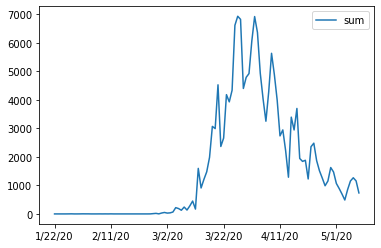

In [93]:
new_cases.plot()

In [125]:
def calc_trend(y : pd.Series, window_size: int):
    x = list(range(0, len(y)))
    z = np.polyfit(x[-window_size:], np.ravel(y.values[-window_size:]), 1)
    p = np.poly1d(z)
    res = np.empty(len(y))
    res[:] = np.nan
    res[-window_size:] = p(x[-window_size:])
    return res

In [121]:
z = np.polyfit(x[-14:], np.ravel(new_cases.values[-14:]), 1)
p = np.poly1d(z)

In [126]:
calc_trend(new_cases,7)

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [124]:
p(x[-7:])

array([1044.53406593, 1017.74505495,  990.95604396,  964.16703297,
        937.37802198,  910.58901099,  883.8       ])

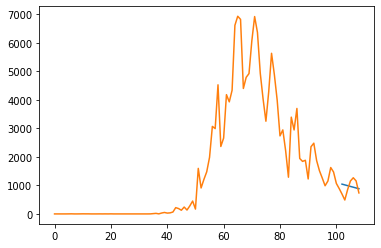

In [122]:
plt.plot(x[-7:],p(x[-7:]))
plt.plot(x,np.ravel(new_cases.values))

In [105]:
np.ravel(new_cases.values[-7:])

array([ 697.,  488.,  855., 1155., 1268., 1158.,  736.])

In [99]:
new_cases.values[-7:].ravel

<function ndarray.ravel>

In [89]:
df_sub[df.columns[4:]].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
5/5/20     167007
5/6/20     168162
5/7/20     169430
5/8/20     170588
5/9/20     171324
Length: 109, dtype: int64

In [123]:
absolute, new, new_rol =  get_lines('Germany')
x = list(range(0,len(new)))


In [76]:
source = ColumnDataSource(data=dict(x=x,absolute=absolute, new=new, new_rol=new_rol ))

In [77]:
source.data

{'x': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108],
 'absolute': array([     0,      0,      0,      0,      0,      1,      4,      4,
             4,      5,      8,     10,     12,     12,     12,     12,
            13,     13,     14,     14,     16,     16,     16,     16,
            16,     16,     16,     16,     16,     16,     16,     16,
            16,     16,     17,     27,  

In [78]:
p = figure(title="Newly Infected", plot_height=300, plot_width=600, y_range=(-100,100),
           background_fill_color='#efefef')
p.circle(-25, 25, radius=5, color=(0.1, 0.3, 0.61), alpha=0.8)


GlyphRenderer(id='1039', ...)

In [80]:
p = figure(title="Newly Infected", plot_height=300, plot_width=600, y_range=(-100,max(new)+100),
           background_fill_color='#efefef')
r = p.line('x', 'new', source=source, color="#8888cc", line_width=1.5, alpha=0.8)
r = p.line('x', 'new_rol',source=source, color="red", line_width=1.5, alpha=0.8)
#r = p.line('x', 'new_rol', color="red", line_width=1.5, alpha=0.8)
multi_select = MultiSelect(title="Option:", value=['Germany'],
                           options=countries)

NameError: name 'countries' is not defined

In [48]:
def update_data(attrname, old, new):
    country = multi_select.value
    absolute, new, new_rol  = get_lines(country)
    x = list(range(0,len(new)))
    source.data = dict(x=x,absolute=absolute, new=new, new_rol=new_rol )

In [49]:
multi_select.on_change('value',update_data )

In [8]:
show(multi_select,notebook_handle=True)
show(p, notebook_handle=True)

NameError: name 'multi_select' is not defined

In [52]:
source.data.keys()

dict_keys(['x', 'absolute', 'new', 'new_rol'])

In [40]:
df.columns[-1]

'4/20/20'

In [41]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/16/20             int64
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
Length: 94, dtype: object

In [168]:
from math import log10, log, ceil

In [91]:
df[df.columns[-1]].apply(lambda x: ceil(log(x)*5) if x>1 else 1).plot()

NameError: name 'ceil' is not defined

In [63]:
[len(df)*1]

[264]

In [65]:
np.ones(len(df))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [71]:
circle_source = ColumnDataSource(dict(x=df["Long"].values,
                                      y=df["Lat"].values,
                                      sizes=np.ones(len(df))
                                      )
                                 )

In [72]:
circle_source.data

{'x': array([  65.      ,   20.1683  ,    1.6596  ,    1.5218  ,   17.8739  ,
         -61.7964  ,  -63.6167  ,   45.0382  ,  149.0124  ,  151.2093  ,
         130.8456  ,  153.4     ,  138.6007  ,  145.9707  ,  144.9631  ,
         115.8605  ,   14.5501  ,   47.5769  ,  -77.3963  ,   50.55    ,
          90.3563  ,  -59.5432  ,   27.9534  ,    4.      ,    2.3158  ,
          90.4336  ,  -63.5887  ,   17.6791  ,  -51.9253  ,  114.7277  ,
          25.4858  ,   -1.5616  ,  -23.0418  ,  104.9167  ,   11.5021  ,
        -116.5765  , -123.1207  , -122.6655  ,  -98.8139  ,  -66.4619  ,
         -57.6604  ,  -63.7443  ,  -85.3232  ,  -63.4168  ,  -73.5491  ,
        -106.4509  ,   20.9394  ,   18.7322  ,  -71.543   ,  117.2264  ,
         116.4142  ,  107.874   ,  117.9874  ,  101.0583  ,  113.4244  ,
         108.7881  ,  106.8748  ,  109.7453  ,  116.1306  ,  127.7615  ,
         113.614   ,  114.2     ,  112.2707  ,  111.7088  ,  113.9448  ,
         119.455   ,  115.7221  ,  126.1923  ,

In [130]:
 from pyproj import CRS

inProj = CRS("WGS84")
outProj =CRS("EPSG:3857")
#outProj = pyproj.Proj(init="EPSG:3857")

In [129]:
outProj

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [119]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")


In [122]:
transformer

<Conversion Transformer: pipeline>
Description: Popular Visualisation Pseudo-Mercator
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [121]:
transformer.transform(120,10)

(inf, inf)

In [103]:
inProj

Proj('+proj=longlat +datum=WGS84 +no_defs', preserve_units=True)

In [99]:
inProj = pyproj.Proj("epsg:4326")
outProj = pyproj.Proj("epsg:3857")

In [101]:
pyproj.transform(inProj,outProj,170,40)

(inf, inf)

In [11]:
l_test = ['Germany_confirmed_total_raw','Germany_confirmed_delta_raw', 'x']

In [12]:
[x for x in l_test if 'total' in x or 'x' in x]

['Germany_confirmed_total_raw', 'x']

In [11]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show

output_file("toolbar.html")

source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A A_asd', 'b', 'C', 'd', 'E'],
))

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]

p = figure(plot_width=400, plot_height=400, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)
show(p, notebook_handle=True)
